In [1]:
#imports http://localhost:8888/notebooks/2.0-ma-processing-data-titanic.ipynb
import pandas as pd
import numpy as np
import os


# import data


In [2]:
#set the path to the data 
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
#read the data set 
test_df = pd.read_csv(test_file_path, index_col='PassengerId')
train_df = pd.read_csv(train_file_path, index_col='PassengerId')


In [4]:
# get the data type 
type(train_df)

pandas.core.frame.DataFrame

In [5]:
#get basic info from a data frame 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# test_df info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
#Since the test data set is missing the variable 'Survived' we should add this
#attribute with a default value of -888 so that we can concat both data sets. 
test_df['Survived'] = -888

In [8]:
#concat the two data sets row wise i.e. stack data frame on top of the other 
# axis = 0 stack on data frame on top of another,
# axis = 1 concat data frames side to side like a sql join
# sort = True means sort the data frames so that variables line up 
df = pd.concat((test_df, train_df), axis=0, sort=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [10]:
# use .head to look at the first few rows of the data

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298


In [11]:
# we can pass a number to see the top n rows
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298
897,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,3,male,0,-888,7538
898,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,3,female,0,-888,330972
899,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,2,male,1,-888,248738
900,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female,0,-888,2657


In [12]:
# .tail to look at the last few rows of the data 
df.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
882,33.0,NaN,S,7.8958,"Markun, Mr. Johann",0,3,male,0,0,349257
883,22.0,NaN,S,10.5167,"Dahlberg, Miss. Gerda Ulrika",0,3,female,0,0,7552
884,28.0,NaN,S,10.5000,"Banfield, Mr. Frederick James",0,2,male,0,0,C.A./SOTON 34068
885,25.0,NaN,S,7.0500,"Sutehall, Mr. Henry Jr",0,3,male,0,0,SOTON/OQ 392076
886,39.0,NaN,Q,29.1250,"Rice, Mrs. William (Margaret Norton)",5,3,female,0,0,382652
887,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607
890,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,1,male,0,1,111369


# Selecting Rows and Columns 

In [13]:
# select the name columnwith the dot operator .[Variable Name]
df.Name 

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [14]:
# by passing a string
df['Name']

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [15]:
# we can select more than one column by using array of string
df[['Name', 'Age']]

,Name,Age
PassengerId,,
892,"Kelly, Mr. James",34.5
893,"Wilkes, Mrs. James (Ellen Needs)",47.0
894,"Myles, Mr. Thomas Francis",62.0
895,"Wirz, Mr. Albert",27.0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
897,"Svensson, Mr. Johan Cervin",14.0
898,"Connolly, Miss. Kate",30.0
899,"Caldwell, Mr. Albert Francis",26.0
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0


In [16]:
#select index with .loc[ROWS, COLUMS] 
#if row or columns is left out it selects all the rows of columns 

#select row 5 - 10, the columns is left blank
df.loc[5:10, ]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [17]:
#select rows 5 - 10 , and columsn with the attribute 'Name', and 'Pclass' only
df.loc[5:10, ['Name', 'Pclass']]

,Name,Pclass
PassengerId,,
5,"Allen, Mr. William Henry",3
6,"Moran, Mr. James",3
7,"McCarthy, Mr. Timothy J",1
8,"Palsson, Master. Gosta Leonard",3
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3
10,"Nasser, Mrs. Nicholas (Adele Achem)",2


In [18]:
#select rows 10 - 15 and all the columsn between 'age' and 'Pclass'\
df.loc[10:15, 'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2
11,4.0,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,3
12,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,1
13,20.0,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,3
14,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,3
15,14.0,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,3


In [19]:
# we can use .iloc to use just indexing
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
897,9.2250,"Svensson, Mr. Johan Cervin",0,3,male
898,7.6292,"Connolly, Miss. Kate",0,3,female
899,29.0000,"Caldwell, Mr. Albert Francis",1,2,male
900,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female
901,24.1500,"Davies, Mr. John Samuel",0,3,male


# Filtering 

In [20]:
# filter rows based on a condition

#filter rows so that only the male passengers are selected
male_passengers = df.loc[df.Sex == 'male', :]
print('# of male passagers : {0}'.format(len(male_passengers)))

# of male passagers : 843


In [21]:
#filter the rows so that only passengers 
#who are male and also belong to 1st class are selected
male_pass_fc = df.loc[(df.Sex == 'male') & (df.Pclass == 1), :]
print(('# of male 1st class passagers : {0}').format(len(male_pass_fc)))

# of male 1st class passagers : 179


# Summary Stats
#### centrality measure: mean/median a measure of the center of the data
- mean: average behavior for some feature. However this summary stat is affected by extreme values
- median: middle value of sorted values, if # of values are even get 2 middle and devide by two. not affected by extreme values
#### dispersion measure: range, how similar or disimalar values are
- range: dif between max - min how spead out the data is, easlily affected by extreme values 
- percentiles: 25th, 50th 75th devide the data set into 4 buckets, quartiles spread the data into buckets and obseve the spead(box-whisker plot)
- variance: how far a value is from the mean, affected by extreme values 
- standard deviation: sqrt(variance) 

In [22]:
# .describe() gets summary stats for all numerical features 
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [23]:
# numerical features centrality 
print('Mean Fare: {0}'.format(df.Fare.mean()))
print('median Fare: {0}'.format(df.Fare.median()))

Mean Fare: 33.2954792813
median Fare: 14.4542


In [24]:
#numerical features dispersion
print('Min Fare: {0}'.format(df.Fare.min()))
print('Max Fare: {0}'.format(df.Fare.max()))
print('Range Fare: {0}'.format(df.Fare.max() - df.Fare.min()))
#Quantiles
print('Quantiles')
print('25% Fare: {0}'.format(df.Fare.quantile(.25)))
print('50% Fare: {0}'.format(df.Fare.quantile(.50)))
print('75% Fare: {0}'.format(df.Fare.quantile(.75)))
print('Variance Fare: {0}'.format(df.Fare.var()))
print('standard deviation Fare: {0}'.format(df.Fare.std()))

Min Fare: 0.0
Max Fare: 512.3292
Range Fare: 512.3292
Quantiles
25% Fare: 7.8958
50% Fare: 14.4542
75% Fare: 31.275
Variance Fare: 2678.95973789
standard deviation Fare: 51.7586682392


In [25]:
%matplotlib inline

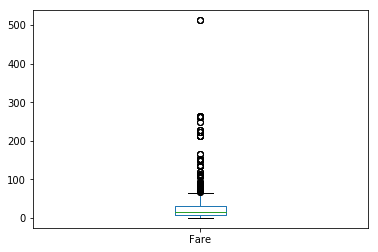

In [26]:
#box-whiskers plot
df.Fare.plot(kind='box')

# catagorical features 
- counts, porportions

In [27]:
# to include catagorical features in the .descrbe() function use include='all'
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [28]:
# catagorial counts 
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [29]:
#catagoriacal proprotions
df.Sex.value_counts(normalize='True')

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [30]:
#fileter out survived 1 and not survived 0
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

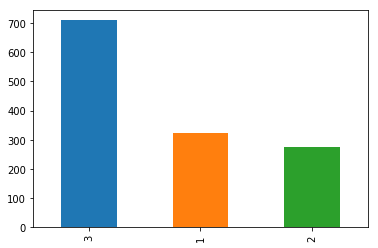

In [32]:
df.Pclass.value_counts().plot(kind='bar')

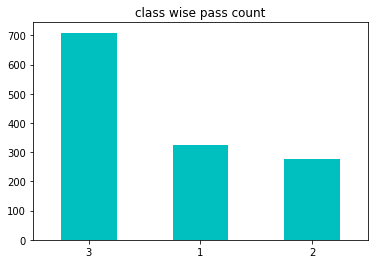

In [33]:
#visualize counts
df.Pclass.value_counts().plot(kind='bar', rot = 0, title='class wise pass count', color='c');

# Univarite dist
- histogram, kernel density estimation (kde)
- skewness: in normal distribution both mean and median are the same, skewness describes off the mean is from the median Right(positive) skew means freq of values accurs on the right hand side of the tail, left (negative) skew means freq of values accur on the left hand side of the tail. 

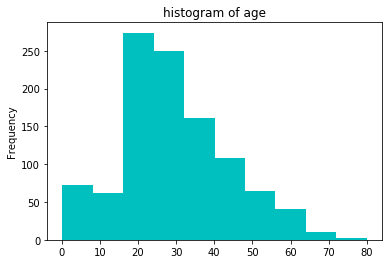

In [34]:
# create a histogram
df.Age.plot(kind='hist', title='histogram of age', color='c');

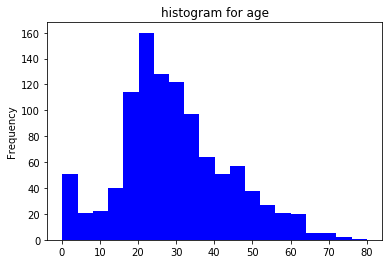

In [35]:
# create a histogram with 20 bins
df.Age.plot(kind='hist', title='histogram for age', color='b', bins=20);

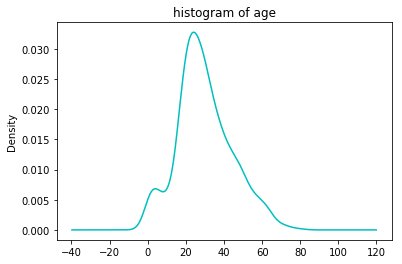

In [36]:
#create kde plot
df.Age.plot(kind='kde', title='histogram of age', color='c');

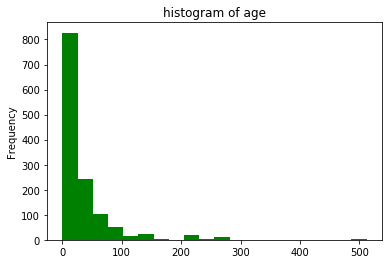

In [37]:
# create a histogram for Fare attribute
df.Fare.plot(kind='hist', title='histogram of age', color='g', bins=20);

In [38]:
# compare the skewness of Fare and Age attributes 
print(' skewness of age: {0:.4f}'.format(df.Age.skew()))
print('skewness of fare: {0:.4f}'.format(df.Fare.skew()))

 skewness of age: 0.4077
skewness of fare: 4.3677


# Bivariate distro
- scatter plot

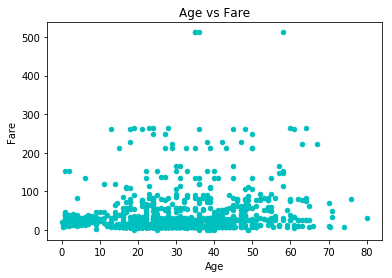

In [39]:
#plot a scatter plot of age vs fare 
df.plot.scatter(x='Age', y='Fare', title='Age vs Fare', color='c', )

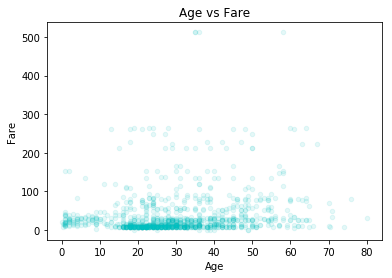

In [40]:
# use alpha to change transperancy range[0,1]
# we may see something in the clump of dots
df.plot.scatter(x='Age', y='Fare', title='Age vs Fare', color='c', alpha=.1);

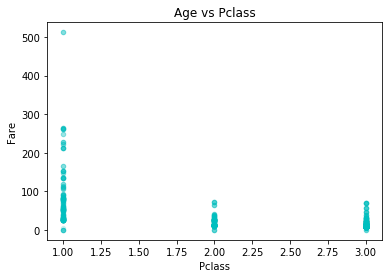

In [41]:
df.plot.scatter(x='Pclass', y='Fare', title='Age vs Pclass', color='c', alpha=.15);

# Grouping and aggrigation


In [42]:
# group by sex then get the median age
df.groupby(['Sex']).Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [43]:
#group by passenger class get the median fare for each group 
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [44]:
# group by passenger class get the median Fare and the median Age
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [45]:
# group by passenger class get the mean Fare and median age per passenger class 
# use .agg() this function takes in a dictionary object in the form of {Attribute, statistic}
# first a simple dictionary
df.groupby(['Pclass']).agg({'Fare':'mean', 'Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [46]:
# second, a more complex dictionary in the form of :  
# some_var = {
#  attribute0 : {name_of_stat1 : stat1, name_of_stat2 : stat2, ..., name_of_statN : statN}, ... ,
#  attributeN : {name_of_stat1 : stat1, name_of_stat2 : stat2, ..., name_of_statN : statN}
#            }
aggregation = { 
    'Fare' : { 
        'mean_fare' : 'mean',         # we can call a function surrounded by quotes
        'median_fare' : np.median,    # or by calling numpy np
        'max_fare' : max,             # or by just calling the function
        'min_fare' : np.min,
        'range_fare' : lambda x : max(x) - min(x) # calculate the range using a lambda
    },
    'Age' : { 
        'mean_age' : 'mean',         # we can call a function surrounded by quotes
        'median_age' : np.median,    # or by calling numpy np
        'max_age' : max,             # or by just calling the function
        'min_age' : np.min,
        'range_age' : lambda x : max(x) - min(x) # calculate the range using a lambda
    }
}

In [47]:
# pass the dictionary to agg
df.groupby(['Pclass']).agg(aggregation)

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                               Age            \
        mean_fare range_fare  max_fare median_fare min_fare max_age range_age   
Pclass                                                                          
1       87.508992   512.3292  512.3292     60.0000      0.0    80.0     79.08   
2       21.179196    73.5000   73.5000     15.0458      0.0    70.0     69.33   
3       13.302889    69.5500   69.5500      8.0500      0.0    74.0     73.83   

                                      
       min_age median_age   mean_age  
Pclass                                
1         0.92       39.0  39.159930  
2         0.67       29.0  29.506705  
3         0.17       24.0  24.816367

In [48]:
# group by more than one variable
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [49]:
# crosstab on sex and pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


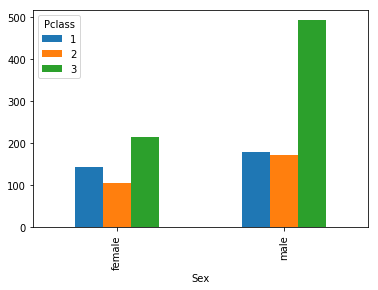

In [50]:
# create a cross tab and plot it
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

In [51]:
#pivot table 
# rows(index) sex, columns passenger class, values used to calc stat age, the statistic(aggfunc) is the mean
df.pivot_table(index= 'Sex' , columns=df.Pclass , values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [52]:
# we can achieve the same results using the .groupby func
# it looks different but the results are the same 
df.groupby(['Sex', df.Pclass]).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [53]:
# we can reproduce a pivot table using unstack()
df.groupby(['Sex', df.Pclass]).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


# data munging
## Issues with data 
1. missing values 
2. extreme values (outliers) 
3. erronous values 

### missing values - value not known for one or more variables 
+ solution: 
    delete data 
    imputation  - replace missing values 
        mean imputation - replace missing numerical value with mean
        median imputation - replace missing numerical value with the median
        mode imputation - replace missing catogaricol with mode
        predictive model - 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [55]:
#extract rows which have missing values for the embark column
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [56]:
# check to see how many ppl embared at different places
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [57]:
# most person embarked in S - south hampton we can use south hampton to fill in the values 
# from the results we can see that both passengers survied we may want to check which embarkment has the most survival and choose that embarkmet instaead
pd.crosstab(df[df.Survived != - 888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [58]:
# we get S as the highest survivors 
# we can impute the missing value with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('s', inplace=True)

In [59]:
# if we look closely we can see that both passengers with missing values baught 1st class tickets at the cost of 
# 80, we can check the median for all the fairs grouped by passenger class and embarked location to see if any of the 1st
# class fares embarkment cost somewhere near 80 - embarkment 'C' cost 76.72 which is close to 80
df.groupby([df.Pclass, df.Embarked]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [60]:
# replace embarked missing values with 'C'
#df.loc([df.Embarked.isnull(), 'Embarked']) = 'C'
df.Embarked.fillna('C', inplace=True)

In [61]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [63]:
# we try to impute missing value in Fare
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [64]:
# we can check the median fare price for persons in 3rd class who boarded in south hamtpon 'S'
df.groupby([df.Pclass, df.Embarked]).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [65]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print median_fare

8.05


In [66]:
# replace missing value with 'S' for fare
df.Fare.fillna(median_fare, inplace=True )
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [67]:
# keep imputing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## variable: Age 

In [68]:
pd.options.display.max_rows = 15
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
902,NaN,NaN,S,7.8958,"Ilieff, Mr. Ylio",0,3,male,0,-888,349220
914,NaN,NaN,S,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,1,female,0,-888,PC 17598
921,NaN,NaN,C,21.6792,"Samaan, Mr. Elias",0,3,male,2,-888,2662
925,NaN,NaN,S,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,3,female,1,-888,W./C. 6607
928,NaN,NaN,S,8.0500,"Roth, Miss. Sarah A",0,3,female,0,-888,342712
931,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,-888,1601
933,NaN,D34,S,26.5500,"Franklin, Mr. Thomas Parham",0,1,male,0,-888,113778
...,...,...,...,...,...,...,...,...,...,...,...
847,NaN,NaN,S,69.5500,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343


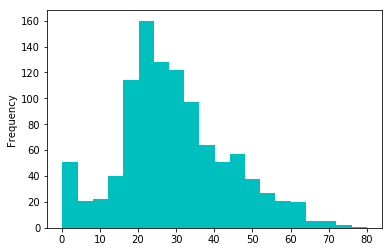

In [69]:
# option 1 replace all missing ages with the mean or median age
df.Age.plot(kind='hist', bins=20, color='c');

In [70]:
df.Age.mean()

29.881137667304014

In [71]:
df.Age.median()

28.0

In [72]:
# option 2 replace age per sex with mean or median age
df.groupby(['Sex']).Age.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [73]:
df.groupby(['Sex']).Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

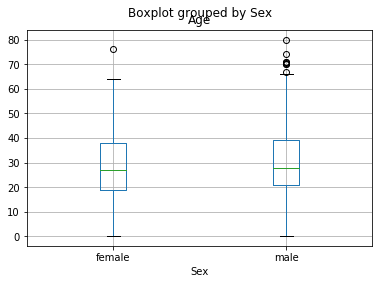

In [74]:
#visualize the age using a boxplot
df[df.Age.notnull()].boxplot('Age', 'Sex');

In [75]:
# age of men and women seem to be very close 
# impute the missing values 
# age_sex_med = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_med, inplace=True)

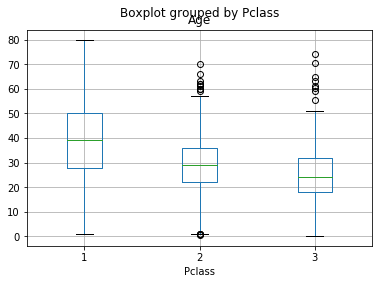

In [76]:
# option 3 replace median age with with pclass median age
df[df.Age.notnull()].boxplot('Age', 'Pclass')
# pclass_age_med = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_med, inplace=True)

In [77]:
df.Name

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                      Svensson, Mr. Johan Cervin
898                            Connolly, Miss. Kate
                           ...                     
885                          Sutehall, Mr. Henry Jr
886            Rice, Mrs. William (Margaret Norton)
887                           Montvila, Rev. Juozas
888                    Graham, Miss. Margaret Edith
889        Johnston, Miss. Catherine Helen "Carrie"
890                           Behr, Mr. Karl Howell
891                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [78]:
# notice the names have a pattern 
# option 4 replace missing age with title age 

def GetTitle(name) : 
     return name.split(',')[1].split('.')[0].strip().lower()
   

In [79]:
# use map to apply the function to the name variable 
df.Name.map(lambda x : GetTitle(x))

PassengerId
892      mr
893     mrs
894      mr
895      mr
896     mrs
897      mr
898    miss
       ... 
885      mr
886     mrs
887     rev
888    miss
889    miss
890      mr
891      mr
Name: Name, Length: 1309, dtype: object

In [80]:
# use unique to return a list of unique titles 
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona',
       'don', 'mme', 'major', 'lady', 'sir', 'mlle', 'capt',
       'the countess', 'jonkheer'], dtype=object)

In [81]:
# edit GetTitle func to return a few less titles 
def GetTitle(name) : 
    title_g = { 
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master' : 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Officer',
        'mme' : 'Mrs',
        'ms' : 'Mrs',
        'major' : 'Officer',
        'lady' : 'Lady',
        'sir' : 'Sir',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'capt' : 'Officer',
        'the countess' : 'Lady',
        'jonkheer' : 'Lady',
        'dona' : 'Lady'
    }
    return title_g[name.split(',')[1].split('.')[0].strip().lower()]

In [82]:
# create a title feature
df['Title'] = df.Name.map(lambda x : GetTitle(x))

In [83]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911,Mr
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272,Mrs
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276,Mr
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154,Mr
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298,Mrs


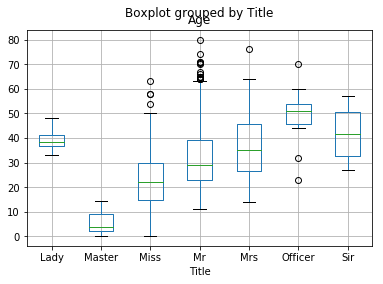

In [84]:
df[df.Age.notnull()].boxplot('Age', 'Title');

In [85]:
# replace missing values 
title_group = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_group, inplace=True)
#print title_group

In [86]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,


# outliers
- outlier detection
    1. histogram
    2. boxplot
    3. scatterplot 
- treatment 
    1. remove data 
    2. transform features 
    3. impute the feature
    4. binning

## Age

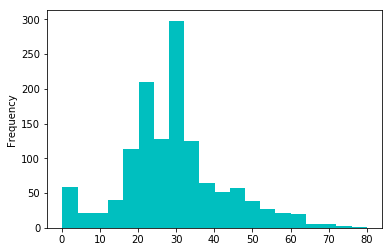

In [87]:
# use a histogram to get an undertanding of the distribution 
df.Age.plot(kind='hist', bins=20, color='c');

In [88]:
# explore the rows where the age is greater than 70
df[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr


## Fare 

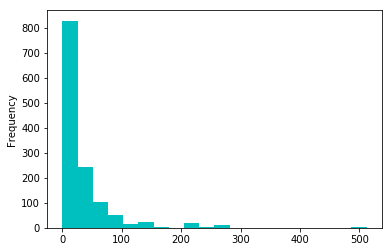

In [89]:
# explore fare outlier
df.Fare.plot(kind='hist', color='c', bins=20);

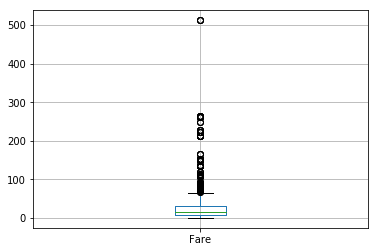

In [90]:
# fare outliers 
#df.Fare.plot(kind='box'); #same plot 
df.boxplot('Fare');

In [91]:
# looking at passengers with the highest fare; they all have the same ticket number 
df[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr


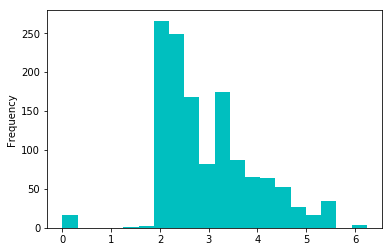

In [92]:
# fare has an outlier, we can take the log of fare to make the variable act a little better 
log_fare = np.log(df.Fare + 1.0)
log_fare.plot(kind='hist', color='c', bins=20);

In [93]:
#binning - create a discrete catagory from a numerical feature
# here we are going from some amount to very_low cost, low cost, high cost and very high cost
pd.qcut(df.Fare, 4)

PassengerId
892     (-0.001, 7.896]
893     (-0.001, 7.896]
894     (7.896, 14.454]
895     (7.896, 14.454]
896     (7.896, 14.454]
897     (7.896, 14.454]
898     (-0.001, 7.896]
             ...       
885     (-0.001, 7.896]
886    (14.454, 31.275]
887     (7.896, 14.454]
888    (14.454, 31.275]
889    (14.454, 31.275]
890    (14.454, 31.275]
891     (-0.001, 7.896]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

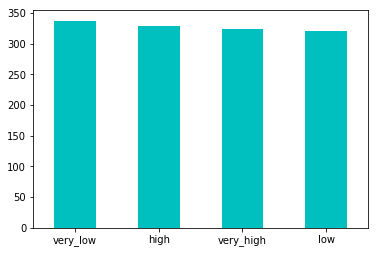

In [94]:
pd.qcut(df.Fare,4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar',color='c', rot=0);

In [95]:
# lets insert this catagorical feature into our set
# call it Fare_Bin
#df['Variable_Name'] = pd.qcut(df.Variable, num_bins, labels=[string array of labels sizeof(num_bins)])
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

# Feature Engineering

## Feature: Age state (child or adult)

- transformation 
- creation (using domain expertise)
- selection

In [96]:
# create a variable called age state if age >= 18 adult otherwise child 
df['AgeState'] = np.where(df.Age >= 18, 'Adult', 'Child')
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [97]:
# check to see how many children survied 
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


# Feature: family size


In [98]:
# create an attribute family size 
df['FamilySize'] = df.Parch + df.SibSp + 1

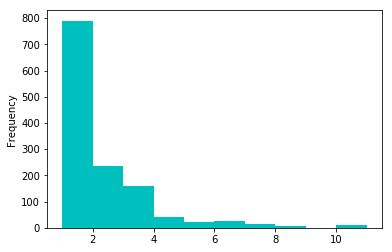

In [99]:
# plot the family size
df['FamilySize'].plot(kind='hist', color='c')

In [100]:
# always examine extreme values they might contain interesting insights
df[df.FamilySize == df.FamilySize.max()]


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_high,Adult,11
1252,14.5,NaN,S,69.55,"Sage, Master. William Henry",2,3,male,8,-888,CA. 2343,Master,very_high,Child,11
1257,35.0,NaN,S,69.55,"Sage, Mrs. John (Annie Bullen)",9,3,female,1,-888,CA. 2343,Mrs,very_high,Adult,11
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11


In [101]:
# we can see that in small sized families all family members survived, the same is not true for large sized families 
pd.crosstab(df[df.FamilySize != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


# Feature: IsMother

In [102]:
# mothers with small children were supposedly given prioraty in life boats
# lets check if this is true
                #           if female        &   has a child    and             and  title not miss  1 else 0
df['IsMother'] = np.where((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss'), 1, 0)

In [103]:
# from the results we can see that this assumption was indeed true 
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother )

IsMother,0,1
Survived,,
0,533,16
1,303,39


# Feature : Deck

In [104]:
# lets look at the cabin attribute
df.Cabin

PassengerId
892     NaN
893     NaN
894     NaN
895     NaN
896     NaN
897     NaN
898     NaN
       ... 
885     NaN
886     NaN
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 1309, dtype: object

In [105]:
#look at unique cabin numbers 
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [106]:
# explore the 'T' cabin
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [107]:
# do not create a variable for 'T' this assignment may have been a mistake
# set 'T' to NaN

#var.loc[rowSelect == 'T', varSelect] = someValue
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [108]:
def get_deck(cabin) : 
    # where the value is not null, return the 1st char of string otherwise 'Z'
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [109]:
# look at the count of the variables
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [110]:
# check survival rates for cabins 
# cabins is a good indicator for survival Deck B, C, E have a very high surv rate 
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [111]:
# if we look at the data frame info we can see that we have 17 features
# a few of them are objects or catagories
# some machine learning algorithms only use numerical features 
# therefore we shall use a technique called catigorical feature encoding 
# to transform these object and catagories 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


### Bianary encoding: use when you have a feature with 2 classes like is_female sex F = 1 or M = 0
### Label encoding : use an integer to encode different levels example passenger fare : low = 1, med = 2, high = 3, if there ordered catagories use level encoding 
### one-hot encoding: create as many features as there catagories example food create: is_hotdog, is_burger, is_vegetable, is_fries if the food we are encoding is a hamburger then is_hamburger would get a 1 while the rest of the variables would get a 0s
|label|is_hotdog|is_burger|is_veg|
|---|---|---|---|
|aHotDog|1|0|0|
|aBurg|0|1|0|
|aVeg|0|0|1|

In [112]:
# bianary encode sex into ismale variable 
df['IsMale'] = np.where(df.Sex == 'Male', 1, 0)

In [113]:
# create one hot encoding with get_dummies this will create one-hots 
# for all the vairables passed "columns=[ ... ]"

#data frame = df.get_dummies(data frame, columns=[varToCreate dummies with ... ])
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

In [114]:
# Notice that all of the catagorical features have been encoded using binary 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcl

In [115]:
# drop variables which are catagorical 

#axis = 1 , means drop colums, inplace=True means do not create a copy just drop variables 
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [116]:
# reorder the columns so that survived is at the front of the data frame

columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_

# saved the proccessed data

In [118]:
pro_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(pro_data_path, 'train.csv')
write_test_path = os.path.join(pro_data_path, 'test.csv')

In [119]:
# train data set 
df.loc[df.Survived != -888].to_csv(write_train_path)

# test data set 
columns = [col for col in df.columns if col != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path)

# build data procesing script


In [120]:
get_processed_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'get_processed_data.py')

In [129]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd 
import os

def read_data(): 
    raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0, sort=True)
    return df


def process_data(df) : 
    return (df
            #create a title attribute
            .assign(Title= lambda x : x.Name.map(get_title))
            #working missing values 
            .pipe(fill_missing_values)
            #create fare bin
            .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']))
            # create age state
            .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult', 'Child'))
            .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
            .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0 ))
            # create deck feature
            .assign(Cabin = lambda x : np.where(x.Cabin == 'T', np.nan, x.Cabin) )
            .assign(Deck = lambda x: x.Cabin.map(get_deck))
            # feature encoding 
            .assign(IsMale = lambda x: np.where(x.Sex == 'male',1 ,0))
            .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])
            # add code to drop unnecessary columns 
            .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1)
            .pipe(reorder_columns)
           )

def get_title(name) : 
    title_g = { 
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master' : 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Officer',
        'mme' : 'Mrs',
        'ms' : 'Mrs',
        'major' : 'Officer',
        'lady' : 'Lady',
        'sir' : 'Sir',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'capt' : 'Officer',
        'the countess' : 'Lady',
        'jonkheer' : 'Lady',
        'dona' : 'Lady'
    }
    return title_g[name.split(',')[1].split('.')[0].strip().lower()]

def get_deck(cabin) : 
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

def fill_missing_values(df) : 
    # embarked
    df.Embarked.fillna('C', inplace=True)
    #fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace=True)
    return df

def reorder_columns(df) : 
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df

def write_data(df) : 
    pro_data_path = os.path.join(os.path.pardir, 'data', 'processed')
    write_train_path = os.path.join(pro_data_path, 'train.csv')
    write_test_path = os.path.join(pro_data_path, 'test.csv')
    # train data set 
    df.loc[df.Survived != -888].to_csv(write_train_path)
    # test data set 
    columns = [col for col in df.columns if col != 'Survived']
    df.loc[df.Survived == -888, columns].to_csv(write_test_path)
    
if __name__ == '__main__' : 
    df=read_data()
    df=process_data(df)
    write_data(df)


Overwriting ..\src\data\get_processed_data.py


In [130]:
!python $get_processed_data_script_file

In [132]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [133]:
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
IsMale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_Z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 non-

# Advanced visualization with matplotlib

In [135]:
import matplotlib.pyplot as plt
# see the visualization inside the jupyter notebook 
%matplotlib inline

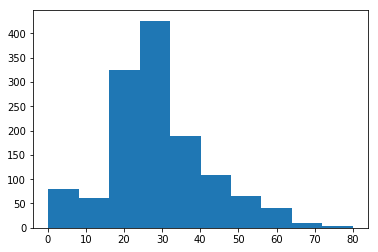

In [137]:
plt.hist(df.Age);

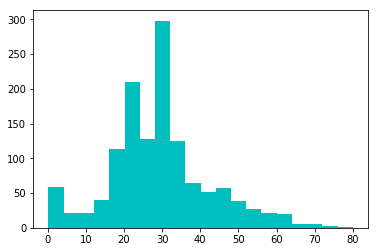

In [141]:
plt.hist(df.Age, bins=20, color='c');
plt.show()

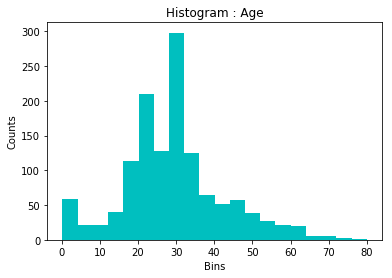

In [144]:
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age') # title
ax.set_xlabel('Bins')  # x label
ax.set_ylabel('Counts') # y label  
plt.show()

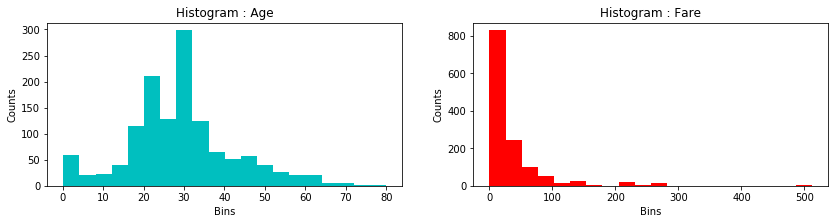

In [146]:
#f, (obj1, obj2) = plt.subplots(1row, 2columns, figsize=(inch, inch))
f, (ax, ax1) = plt.subplots(1,2, figsize=(14,3))
#obj1
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age') # title
ax.set_xlabel('Bins')  # x label
ax.set_ylabel('Counts') # y label  
#obj2
ax1.hist(df.Fare, bins=20, color='r')
ax1.set_title('Histogram : Fare') # title
ax1.set_xlabel('Bins')  # x label
ax1.set_ylabel('Counts') # y label  
plt.show()

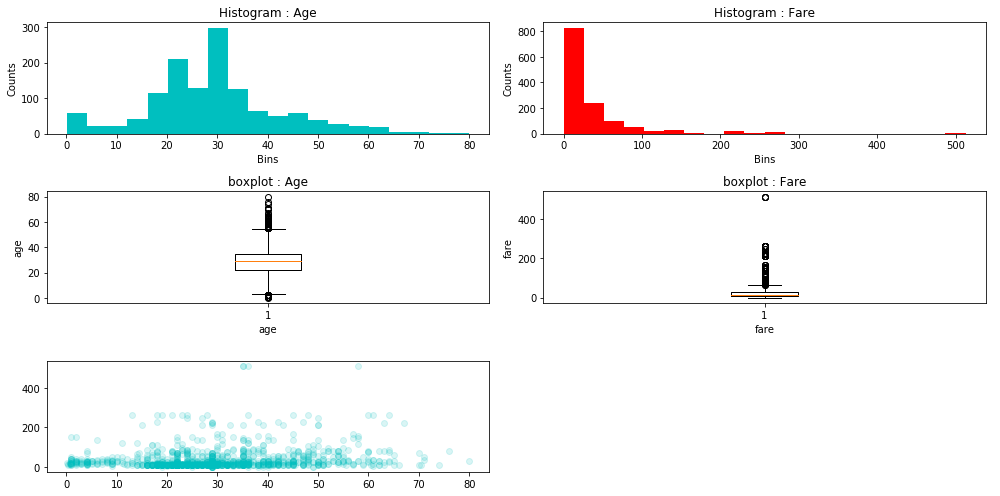

In [153]:
f, ax_arr = plt.subplots(3, 2, figsize=(14,7))
#obj1
ax_arr[0,0].hist(df.Age, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Age') # title
ax_arr[0,0].set_xlabel('Bins')  # x label
ax_arr[0,0].set_ylabel('Counts') # y label  
#obj2
ax_arr[0,1].hist(df.Fare, bins=20, color='r')
ax_arr[0,1].set_title('Histogram : Fare') # title
ax_arr[0,1].set_xlabel('Bins')  # x label
ax_arr[0,1].set_ylabel('Counts') # y label 
#obj3
ax_arr[1,0].boxplot(df.Age.values)
ax_arr[1,0].set_title('boxplot : Age') # title
ax_arr[1,0].set_xlabel('age')  # x label
ax_arr[1,0].set_ylabel('age') # y label  
#obj4
ax_arr[1,1].boxplot(df.Fare.values)
ax_arr[1,1].set_title('boxplot : Fare') # title
ax_arr[1,1].set_xlabel('fare')  # x label
ax_arr[1,1].set_ylabel('fare') # y label
#obj5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)

ax_arr[2,1].axis('off') # remove an unused space
plt.tight_layout() # make the plots neater looking, removes some white space

plt.show()

